<a href="https://colab.research.google.com/github/noushin94/myExercising/blob/main/cifar10CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models , layers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer# it directly  do on hot

In [17]:
def preprocessing_data():
   (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
   X_train , X_test = X_train/255.0 , X_test/255.0
   le = LabelBinarizer()
   Y_train = le.fit_transform(Y_train)
   Y_test = le.transform(Y_test)
   return X_train, X_test , Y_train, Y_test

In [18]:
def CNN_model():

  net = models.Sequential([

                           layers.Conv2D(32, (3,3), activation= "relu", input_shape = (32,32,3)),
                           layers.BatchNormalization(),
                           layers.Conv2D(32, (3,3), activation= "relu"),
                           layers.MaxPooling2D(),


                           layers.Conv2D(64, (3,3), activation= "relu"),
                           layers.BatchNormalization(),
                           layers.Conv2D(64, (3,3), activation= "relu"),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D(),



                           layers.Flatten(),
                           layers.Dense(512, activation= "relu"),
                           layers.BatchNormalization(),
                           layers.Dense(10, activation= "softmax"),





  ])


  net.compile( optimizer= "SGD",
               metrics= ["accuracy"],
               loss= "categorical_crossentropy"
              )

  return net

In [27]:
def showing_result():

  plt.plot(H.history["accuracy"] , label= "train accuracy")
  plt.plot(H.history["val_accuracy"] , label= "test accuracy")
  plt.plot(H.history["loss"] , label= "train loss")
  plt.plot(H.history["val_loss"] , label= "test loss")
  plt.xlabel("epochs")
  plt.ylabel("accuracy/loss")
  plt.title("CNN model for cifar")
  plt.legend()
  plt.show()
  pass

In [22]:
X_train, X_test , Y_train, Y_test= preprocessing_data()

In [23]:
net = CNN_model()

In [24]:
aug = ImageDataGenerator(rotation_range= 30,
                         width_shift_range= 0.1,
                         height_shift_range= 0.1,
                         shear_range=0.2,
                         zoom_range= 0.2,
                         horizontal_flip= True,
                         fill_mode= "nearest")

In [25]:
H = net.fit(aug.flow(X_train, Y_train, batch_size= 32), steps_per_epoch= len(X_train)/32,  validation_data= (X_test, Y_test), epochs = 10)

Epoch 1/10
1562/1562 [==============================] - 38s 23ms/step - loss: 1.6718 - accuracy: 0.4103 - val_loss: 1.6233 - val_accuracy: 0.4649
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.3832 - accuracy: 0.5086 - val_loss: 1.3538 - val_accuracy: 0.5290
Epoch 3/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.2583 - accuracy: 0.5546 - val_loss: 1.3382 - val_accuracy: 0.5631
Epoch 4/10
1562/1562 [==============================] - 35s 23ms/step - loss: 1.1771 - accuracy: 0.5824 - val_loss: 1.0689 - val_accuracy: 0.6345
Epoch 5/10
1562/1562 [==============================] - 35s 22ms/step - loss: 1.1101 - accuracy: 0.6093 - val_loss: 1.1160 - val_accuracy: 0.6132
Epoch 6/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.0633 - accuracy: 0.6268 - val_loss: 1.0219 - val_accuracy: 0.6522
Epoch 7/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.0209 - accuracy: 0.6434 - val_loss: 1.0230 -

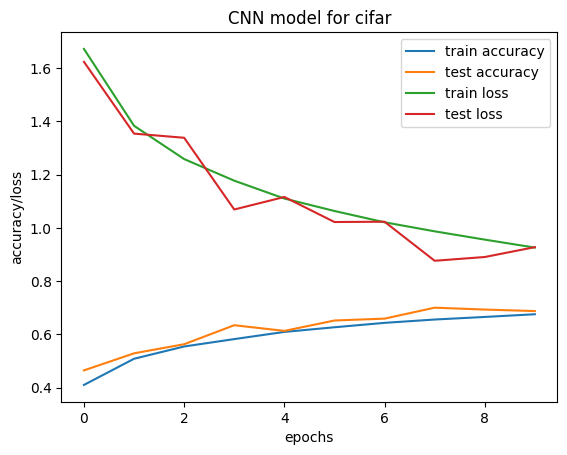

In [28]:
showing_result()